In [4]:
# Nhập các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Đặt random state để đảm bảo kết quả tái lập
RANDOM_STATE_SEED = 420

# Kiểm tra xem các thư viện đã được import thành công
print("Thư viện đã được import thành công!")

Thư viện đã được import thành công!


In [6]:
# Đọc file CSV theo chunks
chunk_size = 10000000  # Đọc 100,000 dòng mỗi lần
chunks = pd.read_csv('Dataset/CSE-CIC-IDS2018/processed_cse_cic_ids2018_malicious_benign.csv', chunksize=chunk_size)

# Lấy chunk đầu tiên để kiểm tra
data_chunk = next(chunks)

# Kiểm tra 5 dòng đầu của chunk
print("5 dòng đầu của chunk dữ liệu:")
print(data_chunk.head())

# Kiểm tra thông tin chunk (kiểu dữ liệu, giá trị null)
print("\nThông tin chunk dữ liệu:")
print(data_chunk.info())

# Kiểm tra phân bố nhãn (Label) trong chunk
print("\nPhân bố nhãn trong chunk:")
print(data_chunk['Label'].value_counts())

5 dòng đầu của chunk dữ liệu:
   Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0         141385             9             7              553   
1            281             2             1               38   
2         279824            11            15             1086   
3            132             2             0                0   
4         274016             9            13             1285   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0           3773.0              202                0         61.444444   
1              0.0               38                0         19.000000   
2          10527.0              385                0         98.727273   
3              0.0                0                0          0.000000   
4           6141.0              517                0        142.777778   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  Active Min  \
0        87.534438             1460  ...         0.0  

In [8]:
# Tách đặc trưng (X) và nhãn (y)
X = data_chunk.drop('Label', axis=1)
y = data_chunk['Label']

# Chuẩn hóa dữ liệu bằng StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tách tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=420
)

# Kiểm tra kích thước các tập
print("Kích thước tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)

# Kiểm tra phân bố nhãn trong tập huấn luyện
print("\nPhân bố nhãn trong tập huấn luyện:")
print(pd.Series(y_train).value_counts())

Kích thước tập huấn luyện: (3817864, 72) (3817864,)
Kích thước tập kiểm tra: (954467, 72) (954467,)

Phân bố nhãn trong tập huấn luyện:
Label
0    3308058
1     509806
Name: count, dtype: int64


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier(
    n_estimators=100,
    random_state=420,
    class_weight='balanced',
    n_jobs=-1
)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Độ chính xác trên tập kiểm tra:", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malicious (1)']))

Độ chính xác trên tập kiểm tra: 0.9993388980446679

Báo cáo phân loại:
               precision    recall  f1-score   support

   Benign (0)       1.00      1.00      1.00    827335
Malicious (1)       1.00      1.00      1.00    127132

     accuracy                           1.00    954467
    macro avg       1.00      1.00      1.00    954467
 weighted avg       1.00      1.00      1.00    954467



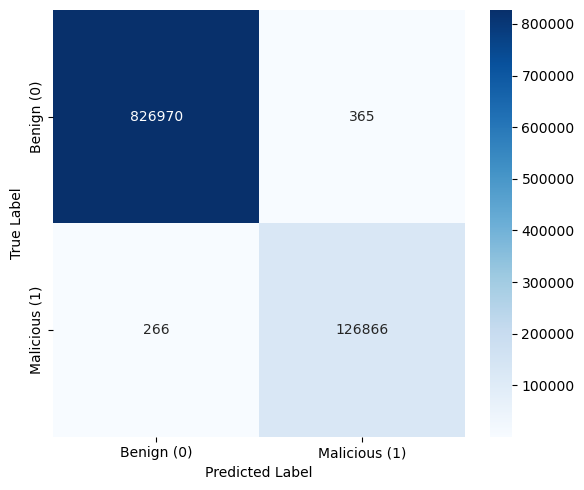

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Tính các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Vẽ ma trận nhầm lẫn bằng heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Benign (0)', 'Malicious (1)'], 
            yticklabels=['Benign (0)', 'Malicious (1)'])

# Thêm nhãn trục
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#### Kiểm tra xem có bị Overfitting

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Đọc chunk mới từ file (bỏ qua chunk đầu tiên đã dùng)
chunk_size = 2000000
chunks = pd.read_csv('Dataset/CSE-CIC-IDS2018/processed_cse_cic_ids2018_malicious_benign.csv', 
                     chunksize=chunk_size, iterator=True)

# Bỏ qua chunk đầu tiên (đã dùng để huấn luyện)
next(chunks)  # Bỏ chunk đầu tiên

# Lấy chunk thứ hai
new_chunk = next(chunks)

# Tách đặc trưng và nhãn
X_new = new_chunk.drop('Label', axis=1)
y_new = new_chunk['Label']

# Chuẩn hóa dữ liệu mới bằng scaler đã fit trên tập huấn luyện
X_new_scaled = scaler.transform(X_new)  # Dùng scaler đã fit trước đó

# Dự đoán trên dữ liệu mới
y_new_pred = model.predict(X_new_scaled)

# Đánh giá hiệu suất
accuracy_new = accuracy_score(y_new, y_new_pred)
precision_new, recall_new, f1_new, _ = precision_recall_fscore_support(y_new, y_new_pred, average='macro')

# In kết quả
print("Độ chính xác trên chunk mới:", accuracy_new)
print("\nBáo cáo phân loại trên chunk mới:")
print(classification_report(y_new, y_new_pred, target_names=['Benign (0)', 'Malicious (1)']))

Độ chính xác trên chunk mới: 0.9995765

Báo cáo phân loại trên chunk mới:
               precision    recall  f1-score   support

   Benign (0)       1.00      1.00      1.00   1854283
Malicious (1)       1.00      1.00      1.00    145717

     accuracy                           1.00   2000000
    macro avg       1.00      1.00      1.00   2000000
 weighted avg       1.00      1.00      1.00   2000000



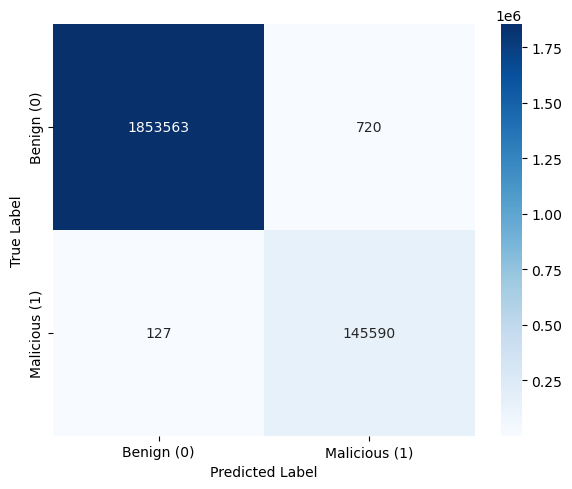

In [35]:
# Tính và vẽ ma trận nhầm lẫn
cm_new = confusion_matrix(y_new, y_new_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Benign (0)', 'Malicious (1)'], 
            yticklabels=['Benign (0)', 'Malicious (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [37]:
import joblib
import os

# Đường dẫn để lưu mô hình (thay đổi theo ý bạn)
save_path = 'trained_models/random-forest-classifier_model.pkl'

# Tạo thư mục nếu chưa tồn tại
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Lưu mô hình vào đường dẫn
joblib.dump(model, save_path)
print(f"Mô hình đã được lưu vào '{save_path}'")

Mô hình đã được lưu vào 'trained_models/random-forest-classifier_model.pkl'


In [39]:
import joblib
import os

scaler_path = 'trained_models/rf_scaler.pkl'
os.makedirs(os.path.dirname(scaler_path), exist_ok=True)
joblib.dump(scaler, scaler_path)
print(f"Scaler đã được lưu vào '{scaler_path}'")

Scaler đã được lưu vào 'trained_models/rf_scaler.pkl'
